In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import geopandas as gpd
from shapely.geometry import Polygon
from sqlalchemy import create_engine

# Set the Matplotlib backend to 'Agg' for non-GUI rendering
plt.switch_backend('Agg')

# Set up the database connection
db_url = 'sqlite:///rh_app.db'  # Replace with your actual database URL
engine = create_engine(db_url)

# Query the database to get the number of devices per state
query = """
SELECT tlkpState.StateAbbrev as state, COUNT(tblTrackerDonorDevices.TrackerDonorDevicesKey) as num_devices
FROM tblTrackerDonorDevices
JOIN tblTrackerDonors ON tblTrackerDonorDevices.TrackerDonorsKey = tblTrackerDonors.TrackerDonorKey
JOIN tlkpState ON tblTrackerDonors.TrackerDonorsStateKey = tlkpState.StateKey
GROUP BY tlkpState.StateAbbrev
"""
df = pd.read_sql(query, engine)

# Download the shapefile for US states if not already present
shapefile_url = "/Users/sarahjiang/rh-db/static/cb_2018_us_state_500k"
shapefile_path = '/Users/sarahjiang/rh-db/static/cb_2018_us_state_500k/cb_2018_us_state_500k.shp'

gdf = gpd.read_file(shapefile_path)

# Ensure the columns are in uppercase and strip any leading/trailing spaces
gdf['STUSPS'] = gdf['iso_a2'].str.upper().str.strip()  # Adjust the column name to match your shapefile
df['state'] = df['state'].str.upper().str.strip()

# Debugging: Check the contents of the columns before merging
print("Shapefile states:", gdf['STUSPS'].unique())
print("Device data states:", df['state'].unique())

# Merge the data with the geopandas dataframe
gdf = gdf.merge(df, left_on='STUSPS', right_on='state', how='left')

# Function to create a color column based on the number of devices
def makeColorColumn(gdf, variable, vmin, vmax):
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)) if pd.notnull(x) else '#FFFFFF')
    return gdf

# Set the value column to visualize
variable = 'num_devices'
vmin, vmax = gdf[variable].min(), gdf[variable].max()
colormap = "YlOrBr"
gdf = makeColorColumn(gdf, variable, vmin, vmax)

# Re-project the geodataframe
gdf = gdf.to_crs('EPSG:2163')

# Check the DataFrame after adding the color column
print(gdf[['STUSPS', 'num_devices', 'value_determined_color']].head())

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# Set the font for the visualization
hfont = {'fontname': 'Helvetica'}

# Add a title
ax.set_title('Number of Devices per State', **hfont, fontdict={'fontsize': '42', 'fontweight': '1'})

# Create colorbar legend
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])
cbax.set_title('Number of Devices\n', **hfont, fontdict={'fontsize': '15', 'fontweight': '0'})

sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cbax, format=FuncFormatter(lambda x, _: int(x)))
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
ax.annotate("Data Source: Your Database", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')

# Plot the main map
gdf.plot(color=gdf['value_determined_color'], linewidth=0.8, ax=ax, edgecolor='0.8')

plt.show()


In [ ]:
import geopandas as gpd

shapefile_path = '/Users/sarahjiang/rh-db/static/cb_2018_us_state_500k/cb_2018_us_state_500k.shp'
gdf = gpd.read_file(shapefile_path)

# Display the columns in the shapefile
print(gdf.columns)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import geopandas as gpd
from sqlalchemy import create_engine

# Set up the database connection
db_url = 'sqlite:///rh_app.db'  # Replace with your actual database URL
engine = create_engine(db_url)

# Query the database to get the number of devices per state
query = """
SELECT tlkpState.StateAbbrev as state, COUNT(tblTrackerDonorDevices.TrackerDonorDevicesKey) as num_devices
FROM tblTrackerDonorDevices
JOIN tblTrackerDonors ON tblTrackerDonorDevices.TrackerDonorsKey = tblTrackerDonors.TrackerDonorKey
JOIN tlkpState ON tblTrackerDonors.TrackerDonorsStateKey = tlkpState.StateKey
GROUP BY tlkpState.StateAbbrev
"""
df = pd.read_sql(query, engine)

# Debugging: Check the SQL query results
print("SQL Query Results:")
print(df.head())

# Path to the shapefile
shapefile_path = '/Users/sarahjiang/rh-db/static/cb_2018_us_state_500k/cb_2018_us_state_500k.shp'
gdf = gpd.read_file(shapefile_path)

# Ensure the columns are in uppercase and strip any leading/trailing spaces
gdf['STUSPS'] = gdf['STUSPS'].str.upper().str.strip()
df['state'] = df['state'].str.upper().str.strip()

# Debugging: Check the contents of the columns before merging
print("Shapefile states:", gdf['STUSPS'].unique())
print("Device data states:", df['state'].unique())

# Merge the data with the geopandas dataframe
gdf = gdf.merge(df, left_on='STUSPS', right_on='state', how='left')

# Function to create a color column based on the number of devices
def makeColorColumn(gdf, variable, vmin, vmax):
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)) if pd.notnull(x) else '#FFFFFF')
    return gdf

# Set the value column to visualize
variable = 'num_devices'
vmin, vmax = gdf[variable].min(), gdf[variable].max()
colormap = "YlOrBr"
gdf = makeColorColumn(gdf, variable, vmin, vmax)

# Re-project the geodataframe
gdf = gdf.to_crs('EPSG:2163')

# Check the DataFrame after adding the color column
print(gdf[['STUSPS', 'num_devices', 'value_determined_color']].head())

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# Set the font for the visualization
hfont = {'fontname': 'Helvetica'}

# Add a title
ax.set_title('Number of Devices per State', **hfont, fontdict={'fontsize': '42', 'fontweight': '1'})

# Create colorbar legend
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])
cbax.set_title('Number of Devices\n', **hfont, fontdict={'fontsize': '15', 'fontweight': '0'})

sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cbax, format=FuncFormatter(lambda x, _: int(x)))
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
ax.annotate("Data Source: Your Database", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')

# Plot the main map
gdf.plot(color=gdf['value_determined_color'], linewidth=0.8, ax=ax, edgecolor='0.8')

plt.show()


In [ ]:
from sqlalchemy import create_engine
import pandas as pd

# Set up the database connection
db_url = 'sqlite:///rh_app.db'  # Replace with your actual database URL
engine = create_engine(db_url)

# Query to check data in tblTrackerDonors
query_donors = "SELECT * FROM tblTrackerDonors"
df_donors = pd.read_sql(query_donors, engine)
print("Tracker Donors:")
print(df_donors.head())

# Query to check data in tblTrackerDonorDevices
query_devices = "SELECT * FROM tblTrackerDonorDevices"
df_devices = pd.read_sql(query_devices, engine)
print("Tracker Donor Devices:")
print(df_devices.head())

# Query to check data in tlkpState
query_states = "SELECT * FROM tlkpState"
df_states = pd.read_sql(query_states, engine)
print("States:")
print(df_states.head())


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import geopandas as gpd
from sqlalchemy import create_engine

# Set up the database connection
db_url = 'sqlite:///rh_app.db'  # Replace with your actual database URL
engine = create_engine(db_url)

# Query the database to get the number of devices per state
query = """
SELECT TrackerDonorsStateKey as state, COUNT(tblTrackerDonorDevices.TrackerDonorDevicesKey) as num_devices
FROM tblTrackerDonorDevices
JOIN tblTrackerDonors ON tblTrackerDonorDevices.TrackerDonorsKey = tblTrackerDonors.TrackerDonorKey
GROUP BY TrackerDonorsStateKey
"""
df = pd.read_sql(query, engine)

# Debugging: Check the SQL query results
print("SQL Query Results:")
print(df.head())

# Map the state key to state abbreviations
state_key_to_abbrev = {
    "AL": "AL", "AK": "AK", "AZ": "AZ", "AR": "AR", "CA": "CA", "CO": "CO", "CT": "CT", "DE": "DE", "DC": "DC",
    "FL": "FL", "GA": "GA", "HI": "HI", "ID": "ID", "IL": "IL", "IN": "IN", "IA": "IA", "KS": "KS", "KY": "KY",
    "LA": "LA", "ME": "ME", "MD": "MD", "MA": "MA", "MI": "MI", "MN": "MN", "MS": "MS", "MO": "MO", "MT": "MT",
    "NE": "NE", "NV": "NV", "NH": "NH", "NJ": "NJ", "NM": "NM", "NY": "NY", "NC": "NC", "ND": "ND", "OH": "OH",
    "OK": "OK", "OR": "OR", "PA": "PA", "RI": "RI", "SC": "SC", "SD": "SD", "TN": "TN", "TX": "TX", "UT": "UT",
    "VT": "VT", "VA": "VA", "WA": "WA", "WV": "WV", "WI": "WI", "WY": "WY"
}

# Replace state keys with state abbreviations in the DataFrame
df['state'] = df['state'].map(state_key_to_abbrev)

# Path to the shapefile
shapefile_path = '/Users/sarahjiang/rh-db/static/cb_2018_us_state_500k/cb_2018_us_state_500k.shp'
gdf = gpd.read_file(shapefile_path)

# Ensure the columns are in uppercase and strip any leading/trailing spaces
gdf['STUSPS'] = gdf['STUSPS'].str.upper().str.strip()
df['state'] = df['state'].str.upper().str.strip()

# Debugging: Check the contents of the columns before merging
print("Shapefile states:", gdf['STUSPS'].unique())
print("Device data states:", df['state'].unique())

# Merge the data with the geopandas dataframe
gdf = gdf.merge(df, left_on='STUSPS', right_on='state', how='left')

# Function to create a color column based on the number of devices
def makeColorColumn(gdf, variable, vmin, vmax):
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)) if pd.notnull(x) else '#FFFFFF')
    return gdf

# Set the value column to visualize
variable = 'num_devices'
vmin, vmax = gdf[variable].min(), gdf[variable].max()
colormap = "YlOrBr"
gdf = makeColorColumn(gdf, variable, vmin, vmax)

# Re-project the geodataframe
gdf = gdf.to_crs('EPSG:2163')

# Check the DataFrame after adding the color column
print(gdf[['STUSPS', 'num_devices', 'value_determined_color']].head())

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# Set the font for the visualization
hfont = {'fontname': 'Helvetica'}

# Add a title
ax.set_title('Number of Devices per State', **hfont, fontdict={'fontsize': '42', 'fontweight': '1'})

# Create colorbar legend
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])
cbax.set_title('Number of Devices\n', **hfont, fontdict={'fontsize': '15', 'fontweight': '0'})

sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cbax, format=FuncFormatter(lambda x, _: int(x)))
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)
ax.annotate("Data Source: Your Database", xy=(0.22, .085), xycoords='figure fraction', fontsize=14, color='#555555')

# Plot the main map
gdf.plot(color=gdf['value_determined_color'], linewidth=0.8, ax=ax, edgecolor='0.8')

plt.show()


SQL Query Results:
  state  num_devices
0    DC            5
1    NY            6
2    WV            4
Shapefile states: ['MS' 'NC' 'OK' 'VA' 'WV' 'LA' 'MI' 'MA' 'ID' 'FL' 'NE' 'WA' 'NM' 'PR'
 'SD' 'TX' 'CA' 'AL' 'GA' 'PA' 'MO' 'CO' 'UT' 'TN' 'WY' 'NY' 'KS' 'AK'
 'NV' 'IL' 'VT' 'MT' 'IA' 'SC' 'NH' 'AZ' 'DC' 'AS' 'VI' 'NJ' 'MD' 'ME'
 'HI' 'DE' 'GU' 'MP' 'RI' 'KY' 'OH' 'WI' 'OR' 'ND' 'AR' 'IN' 'MN' 'CT']
Device data states: ['DC' 'NY' 'WV']
  STUSPS  num_devices value_determined_color
0     MS          NaN                #FFFFFF
1     NC          NaN                #FFFFFF
2     OK          NaN                #FFFFFF
3     VA          NaN                #FFFFFF
4     WV          4.0                #ffffe5


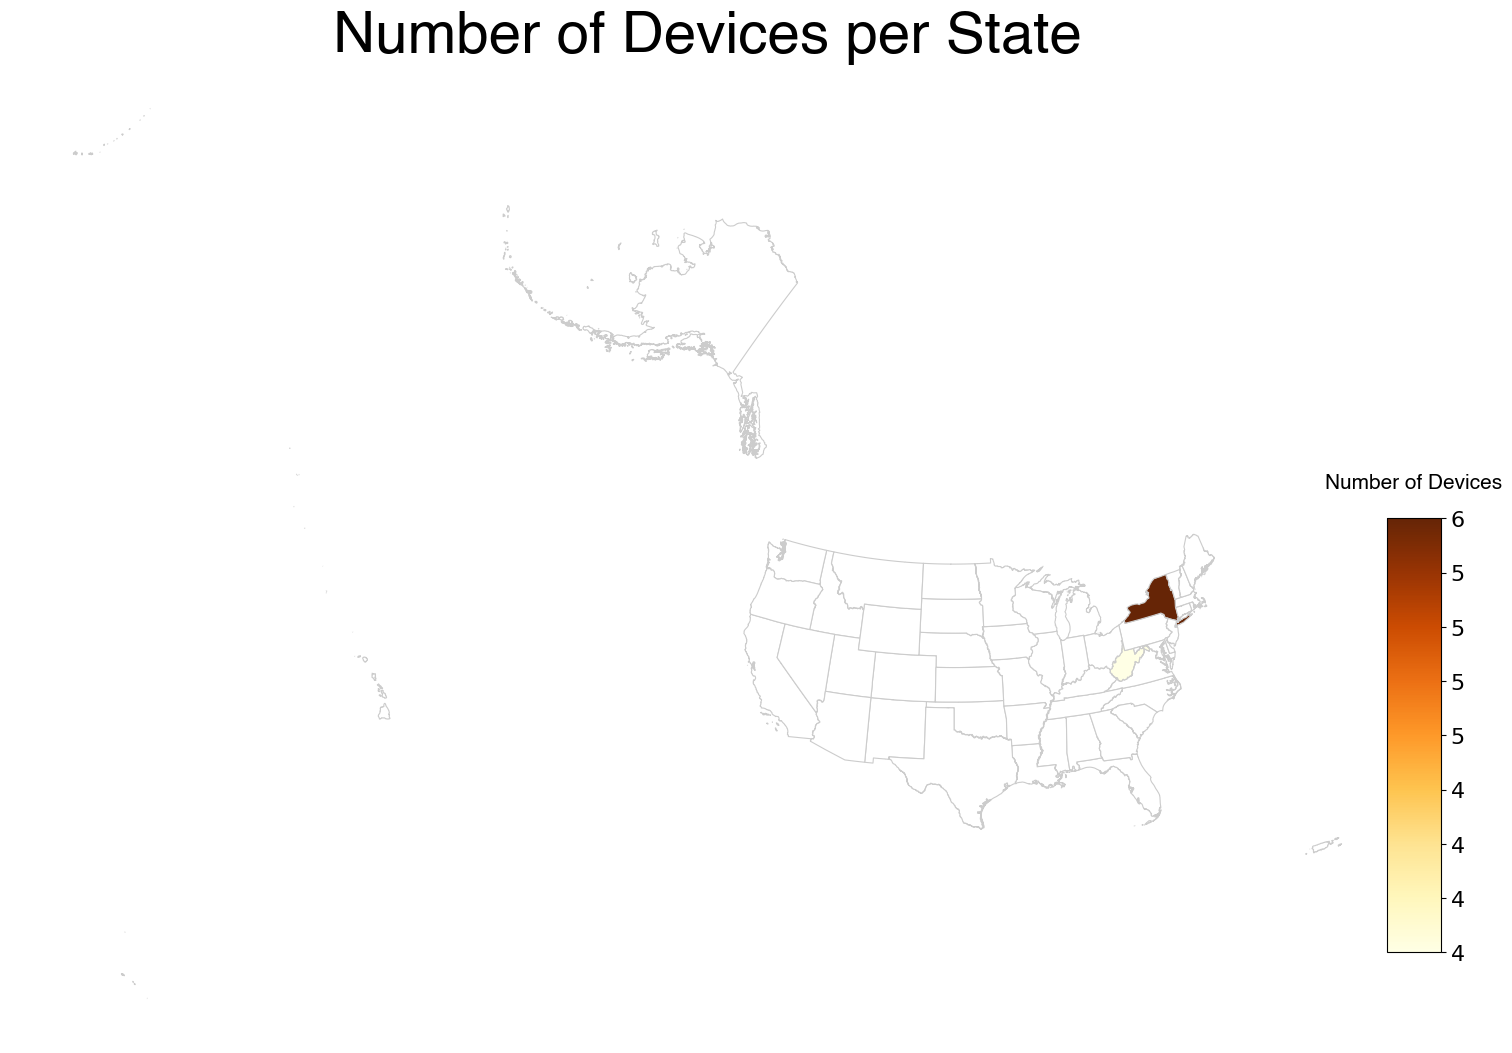

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import geopandas as gpd
from sqlalchemy import create_engine

# Ensure Matplotlib uses the inline backend
%matplotlib inline

# Set up the database connection
db_url = 'sqlite:///rh_app.db'  # Replace with your actual database URL
engine = create_engine(db_url)

# Query the database to get the number of devices per state
query = """
SELECT TrackerDonorsStateKey as state, tblTrackerDonorDevices.TrackerDonorDevicesKey as num_devices
    FROM tblTrackerDonorDevices
    JOIN tblTrackerDonors ON tblTrackerDonorDevices.TrackerDonorsKey = tblTrackerDonors.TrackerDonorKey
    GROUP BY TrackerDonorsStateKey
"""
df = pd.read_sql(query, engine)

# Debugging: Check the SQL query results
print("SQL Query Results:")
print(df.head())

# Path to the shapefile
shapefile_path = '/Users/sarahjiang/rh-db/static/cb_2018_us_state_500k/cb_2018_us_state_500k.shp'
gdf = gpd.read_file(shapefile_path)

# Ensure the columns are in uppercase and strip any leading/trailing spaces
gdf['STUSPS'] = gdf['STUSPS'].str.upper().str.strip()
df['state'] = df['state'].str.upper().str.strip()

# Debugging: Check the contents of the columns before merging
print("Shapefile states:", gdf['STUSPS'].unique())
print("Device data states:", df['state'].unique())

# Merge the data with the geopandas dataframe
gdf = gdf.merge(df, left_on='STUSPS', right_on='state', how='left')

# Function to create a color column based on the number of devices
def makeColorColumn(gdf, variable, vmin, vmax):
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.YlOrBr)
    gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)) if pd.notnull(x) else '#FFFFFF')
    return gdf

# Set the value column to visualize
variable = 'num_devices'
vmin, vmax = gdf[variable].min(), gdf[variable].max()
colormap = "YlOrBr"
gdf = makeColorColumn(gdf, variable, vmin, vmax)

# Re-project the geodataframe
gdf = gdf.to_crs('EPSG:2163')

# Check the DataFrame after adding the color column
print(gdf[['STUSPS', 'num_devices', 'value_determined_color']].head())

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# Set the font for the visualization
hfont = {'fontname': 'Helvetica'}

# Add a title
ax.set_title('Number of Devices per State', **hfont, fontdict={'fontsize': '42', 'fontweight': '1'})

# Create colorbar legend
cbax = fig.add_axes([0.89, 0.21, 0.03, 0.31])
cbax.set_title('Number of Devices\n', **hfont, fontdict={'fontsize': '15', 'fontweight': '0'})

sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cbax, format=FuncFormatter(lambda x, _: int(x)))
tick_font_size = 16
cbax.tick_params(labelsize=tick_font_size)

# Plot the main map
gdf.plot(color=gdf['value_determined_color'], linewidth=0.8, ax=ax, edgecolor='0.8')

plt.show()
